In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Plotten von Tabelle 1

Text(0, 0.5, 'Druck ρ / g/cm³')

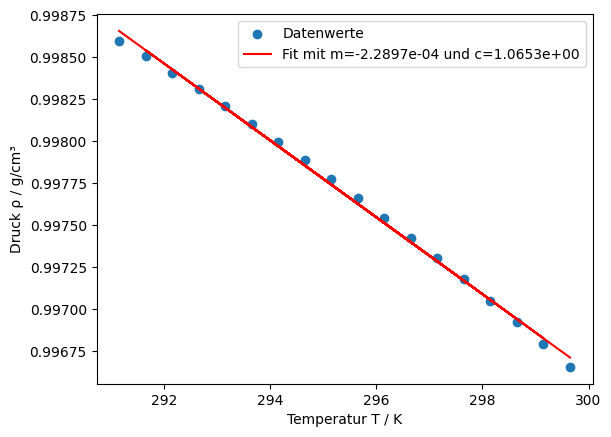

In [38]:
fig, ax = plt.subplots()

tabelle_1 = '18 0,9985976 21 0,9979948 24 0,9972994 18,5 0,9985038 21,5 0,9978852 24,5 0,9971749 19 0,9984073 22 0,997773 25 0,997048 19,5 0,9983081 22,5 0,9976584 25,5 0,9969186 20 0,9982063 23 0,9975412 26 0,996787 20,5 0,9981019 23,5 0,9974215 26,5 0,996653'.replace(
    ",", ".").split(" ")
temp_dichte_wasser = {}
for i in range(int(len(tabelle_1) / 2)):
    temp_dichte_wasser.update({float(tabelle_1[i * 2]) + 273.15: float(tabelle_1[i * 2 + 1])})

Ts = np.array(list(temp_dichte_wasser.keys()))
Ps = np.array(list(temp_dichte_wasser.values()))

ax.scatter(Ts, Ps, label="Datenwerte")
linregress_tabelle1 = linregress(Ts, Ps)
ax.plot(Ts, Ts * linregress_tabelle1.slope + linregress_tabelle1.intercept,
        c="red",
        label=f"Fit mit m={np.format_float_scientific(linregress_tabelle1.slope, 4)} und c={np.format_float_scientific(linregress_tabelle1.intercept, 4)}")
ax.legend()
ax.set_xlabel("Temperatur T / K")
ax.set_ylabel("Druck ρ / g/cm³")

# Plotten von Tabelle 2
Im ersten Versuch wurde versucht mehrere lineare Regressionen zu kombinieren. Dies war jedoch nicht hinreichend genau. Zu Dokumentationszwecken ist hier der alte code aufgeführt:

```python3
fig, ax = plt.subplots(figsize=(7, 5))

temp_druck_dichte_luft = [
    np.array([0.960, 0.973, 0.987, 1.000, 1.013, 1.026]),
    np.array([1.157, 1.173, 1.190, 1.206, 1.222, 1.238]),
    np.array([1.136, 1.152, 1.168, 1.184, 1.199, 1.215]),
    np.array([1.115, 1.131, 1.146, 1.162, 1.177, 1.193]),
]

Temperaturen_tabelle_2 = [288.15, 293.15, 298.15]
colors = ["blue", "red", "green"]

linregress_tabelle2 = [linregress(temp_druck_dichte_luft[0], temp_druck_dichte_luft[x + 1]) for x in range(3)]

for i in range(3):
    ax.plot(temp_druck_dichte_luft[0],
            temp_druck_dichte_luft[0] * linregress_tabelle2[i].slope + linregress_tabelle2[i].intercept,
            c=colors[i],
            label=f"Fit mit m={np.format_float_scientific(linregress_tabelle2[i].slope, 4)}  und c={np.format_float_scientific(linregress_tabelle2[i].intercept, 4)} bei {Temperaturen_tabelle_2[i]} K")

for i in range(3):
    ax.scatter(temp_druck_dichte_luft[0], temp_druck_dichte_luft[i + 1], c=colors[i],
               label=f"Daten bei {Temperaturen_tabelle_2[i]} K")

ax.set_xlabel("Druck p / bar")
ax.set_ylabel("Dichte ρ / g.L^{-1}")
ax.set_title("Tabelle 2")
ax.legend(fontsize="x-small")
```

Um genauere Ergebnisse zu erzielen wurde eine Regression ersten Grades in Abhängigkeit beider Variablen durchgeführt:

In [56]:
from scipy.optimize import curve_fit


def tabelle_2_fit(input, a, b, c):
    Ts = input[:, 0]
    ps = input[:, 1]
    return ps * a + Ts * b + c


druck = ([0.960, 0.973, 0.987, 1.000, 1.013, 1.026])
temperaturen = ([288.15, 293.15, 298.15])
data_in = []
for T in temperaturen:
    for p in druck:
        data_in.append(([T, p]))
Z = np.array(
    [1.157, 1.173, 1.190, 1.206, 1.222, 1.238, 1.136, 1.152, 1.168, 1.184, 1.199, 1.215, 1.115, 1.131, 1.146, 1.162,
     1.177, 1.193])
popt, pcov = curve_fit(tabelle_2_fit, data_in, Z)
a, b, c = popt


Es ergibt sich relativ gut funktionierender Fit, wie im folgenden Plot beobachtet werden kann.

Text(0.5, 1.0, 'Tabelle 2 mit einem einzigen Fit')

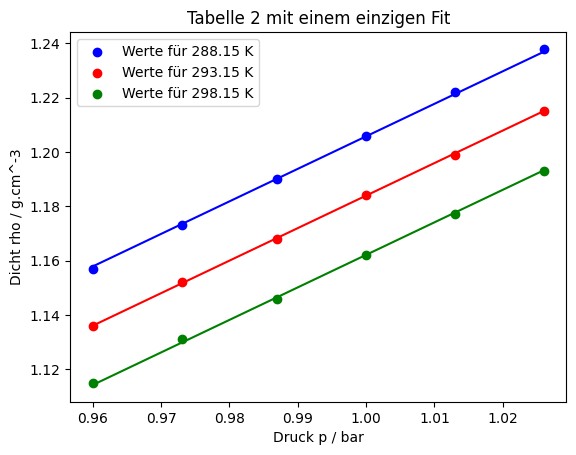

In [54]:

def dichte_luft(p,T):
    return a * p + b * T +c

temp_druck_dichte_luft = [
    np.array([0.960, 0.973, 0.987, 1.000, 1.013, 1.026]),
    np.array([1.157, 1.173, 1.190, 1.206, 1.222, 1.238]),
    np.array([1.136, 1.152, 1.168, 1.184, 1.199, 1.215]),
    np.array([1.115, 1.131, 1.146, 1.162, 1.177, 1.193]),
]
fig, ax = plt.subplots()
Temperaturen_tabelle_2 = [288.15, 293.15, 298.15]
colors = ["blue", "red", "green"]

for i in range(3):
    ax.plot(temp_druck_dichte_luft[0],
            dichte_luft(temp_druck_dichte_luft[0],Temperaturen_tabelle_2[i]),
            c=colors[i])

for i in range(3):
    ax.scatter(temp_druck_dichte_luft[0], temp_druck_dichte_luft[i + 1], c=colors[i], label=f"Werte für {Temperaturen_tabelle_2[i]} K")
ax.set_xlabel("Druck p / bar")
ax.legend()
ax.set_ylabel("Dicht rho / g.cm^-3")
ax.set_title("Tabelle 2 mit einem einzigen Fit")

# Dichte der Luft bei einer Temperatur von T = 21,2°C und bei einem Druck von p= 1,007 bar

Aus dem Diagramm ergibt sich, dass die Dichte Steigungen der Graphen von der Temperatur quasi unabhänhig sind. Die Temperatur fließt lediglich in den y-Achsenabschnitt ein. Es wird demnach der Mittelwert der Steigungen bestimmt und durch lineare Regression der y-Achsenabschnitt bestimmt

In [55]:
print(dichte_luft(1.007,273.15+21.2))

1.1871083702627194


# Plotten von Tabelle 3

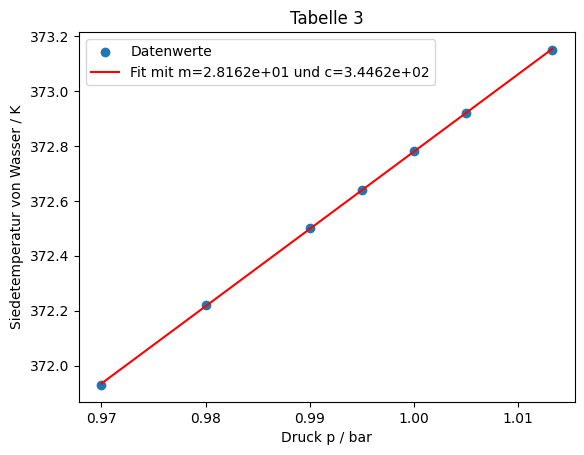

Siedetemperatur von Wasser bei 1007,1 mbar: 373.0 K


In [41]:
ps = np.array([float(x) for x in "0.970 0.980 0.990 0.995 1.000 1.005 1.01325".split(" ")])
Ts = np.array([float(x) for x in "98.78 99.07 99.35 99.49 99.63 99.77 100".split(" ")]) + 273.15

fig, ax = plt.subplots()

ax.scatter(ps, Ts, label="Datenwerte")
linregress_tabelle3 = linregress(ps, Ts)
ax.plot(ps, ps * linregress_tabelle3.slope + linregress_tabelle3.intercept,
        c="red",
        label=f"Fit mit m={np.format_float_scientific(linregress_tabelle3.slope, 4)} und c={np.format_float_scientific(linregress_tabelle3.intercept, 4)}")
ax.legend()
ax.set_xlabel("Druck p / bar")
ax.set_ylabel("Siedetemperatur von Wasser / K")
ax.set_title("Tabelle 3")
plt.show()
print(
    f"Siedetemperatur von Wasser bei 1007,1 mbar: {round(linregress_tabelle3.slope * 1007.1e-3 + linregress_tabelle3.intercept, 1)} K")

# Mindestvolumen Ester

In [42]:
dichte_ester = 0.9e3  #g/L
T = 100 + 273.15  # K (Temperatur im Wasserbad)
V = 0.28e-3  # m³
p = 101325  # Pa (1 atm)
R = 8.3145
molare_masse = 12.011 * 4 + 2 * 15.999 + 8 * 1.008
n_Kolben = (p * V) / (R * T)

masse_ester = molare_masse * n_Kolben
volumen_ester = masse_ester / dichte_ester
print(f"Mindestvolumen: {np.format_float_scientific(volumen_ester, 4)} L")


Mindestvolumen: 8.952e-04 L


# Auswertung (Nicht fürs Antestat!!!)

In [57]:
def molare_masse(m_kolben_leer, m_kolben_ester, m_kolben_wasser, T, p):
    T_kolben_siedend = p * linregress_tabelle3.slope + linregress_tabelle3.intercept

    dichte_wasser = T * linregress_tabelle1.slope + linregress_tabelle1.intercept
    v_kolben = (m_kolben_wasser - m_kolben_leer) / dichte_wasser

    m_ester = (m_kolben_ester - (m_kolben_leer - dichte_luft(p,T) * v_kolben))
    m_ester = m_ester * 1e-3  # Umrechnung in kg

    return (m_ester * R * T_kolben_siedend) / (v_kolben * p)


In [44]:
versuch_1 = [

    # Wägungen
    0,  # Masse leerer Kolben
    0,  # Masse mit Ester im Kolben
    0,  # Masse mit Wasser im Kolben

    # Umgebungsparamter
    273.15 + 0,  # Temperatur der Luft
    0,  # Luftdruck
]
molare_masse_1 = molare_masse(*versuch_1)
print(molare_masse_1)

nan


/tmp/ipykernel_9629/655653831.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return (m_ester * R * T_kolben_siedend) / (v_kolben * p)


In [1]:
versuch_2 = [

    # Wägungen
    0,  # Masse leerer Kolben
    0,  # Masse mit Ester im Kolben
    0,  # Masse mit Wasser im Kolben

    # Umgebungsparamter
    273.15 + 0,  # Temperatur der Luft
    0,  # Luftdruck
]

versuch_3 = [

    # Wägungen
    0,  # Masse leerer Kolben
    0,  # Masse mit Ester im Kolben
    0,  # Masse mit Wasser im Kolben

    # Umgebungsparamter
    273.15 + 0,  # Temperatur der Luft
    0,  # Luftdruck
]
print(f"Mittlere Molmasse: {(molare_masse_1 + molare_masse(*versuch_2) + molare_masse(*versuch_3)) / 3}")

NameError: name 'molare_masse_1' is not defined